In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

In [43]:
# Load the data
file_path = '/home/69a75dc5-ad63-486d-8dbd-271a53b9786b/NOC INCIDENTS.xlsx'  # Use forward slashes or raw string to avoid escape characters
data = pd.read_excel(file_path)

In [45]:
# Convert 'Open Time' and 'Resolved Time' to datetime
data['Open Time'] = pd.to_datetime(data['Open Time'])
data['Resolved Time'] = pd.to_datetime(data['Resolved Time'])

In [47]:
# Extract day, month, and year from 'Open Time'
data['Year'] = data['Open Time'].dt.year
data['Month'] = data['Open Time'].dt.month
data['Day'] = data['Open Time'].dt.day

In [49]:
# Filter data for the last few months to predict July 2024 trends
recent_months_data = data[data['Open Time'] >= '2024-01-01']

In [51]:
# Group by 'Year', 'Month', 'Day', 'Area', and 'Subcategory' to see the number of incidents
daily_trends = data.groupby(['Year', 'Month', 'Day', 'Area', 'Subcategory']).size().reset_index(name='Incident Count')

In [53]:
# Calculate the average daily incidents for each 'Area' and 'Subcategory'
average_daily_trends = daily_trends.groupby(['Area', 'Subcategory', 'Day'])['Incident Count'].mean().reset_index(name='Average Daily Incident Count')

In [55]:
# Pivot the data for heatmap
pivot_table = average_daily_trends.pivot_table(index='Subcategory', columns='Day', values='Average Daily Incident Count')

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


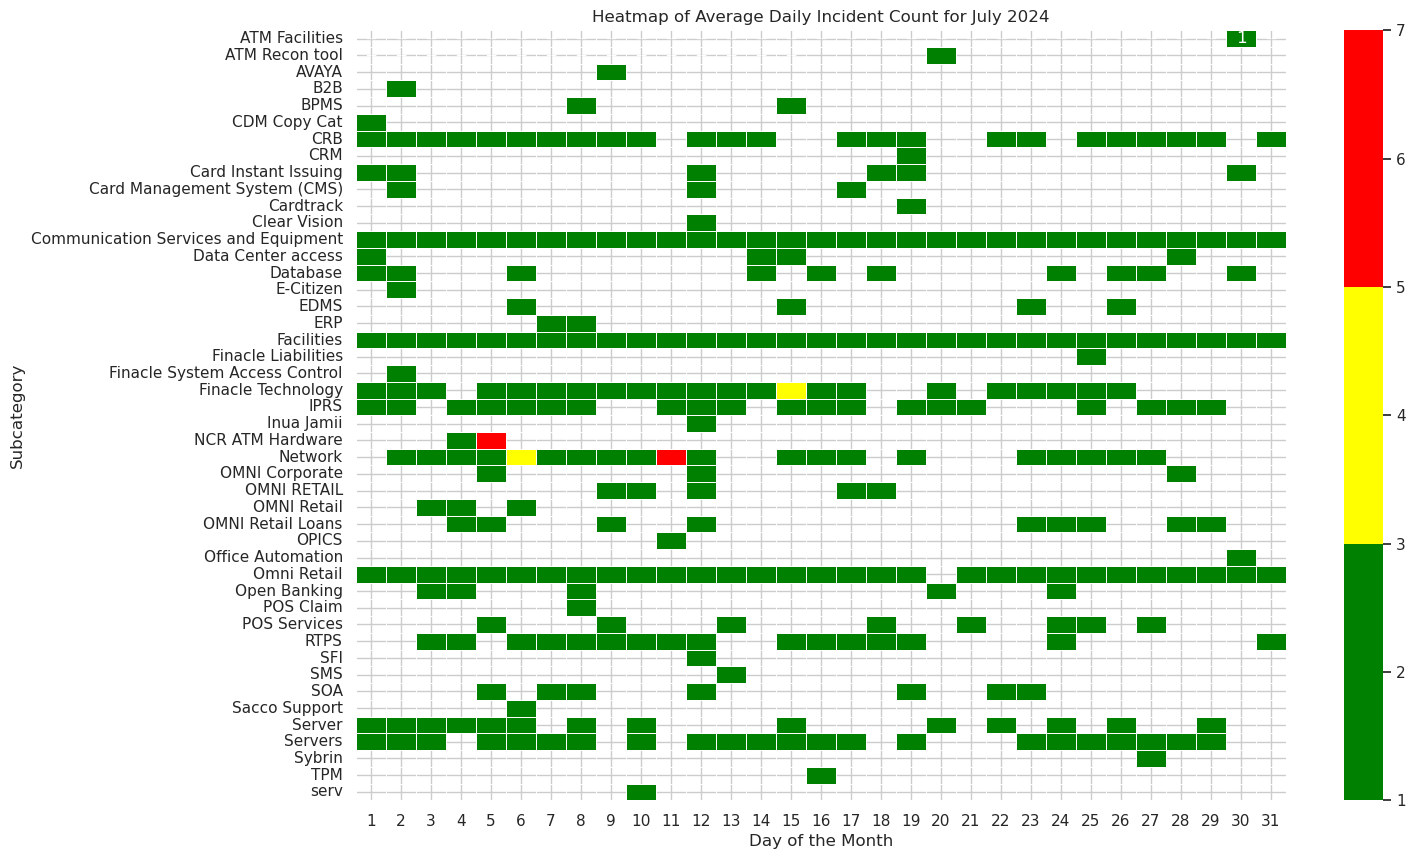

In [57]:
# Define the custom colors for the colormap
colors = ['green', 'yellow', 'red']
cmap = mcolors.ListedColormap(colors)

# Plot the heatmap
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, annot=True, cmap=cmap, linewidths=.5)

plt.title('Heatmap of Average Daily Incident Count for July 2024')
plt.xlabel('Day of the Month')
plt.ylabel('Subcategory')

plt.show()